In [71]:
import numpy as np 
import pandas as pd 
import os


In [66]:
dataset=pd.read_csv(r'C:\Users\Diksha Nasa\Desktop\Diksha_projects\kaggle_titanic\train.csv')

In [67]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
#Creating function for bar plot

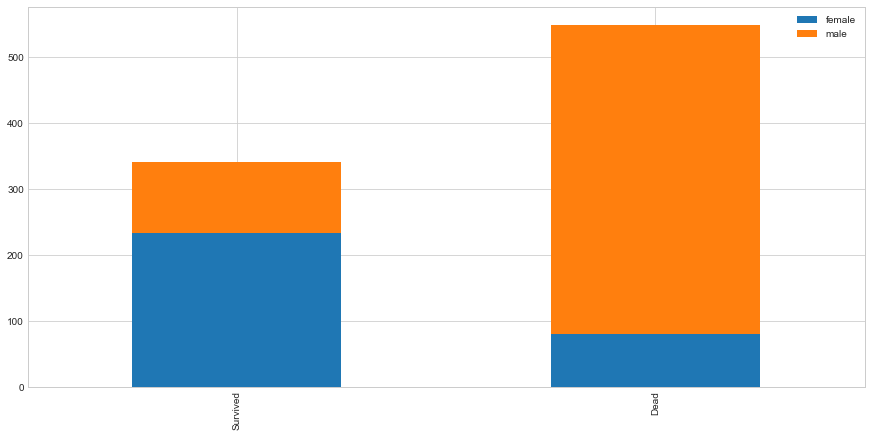

In [83]:
def bar_chart(feature):
    survived=dataset[dataset['Survived']==1][feature].value_counts()
    dead=dataset[dataset['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(15,7))
bar_chart('Sex')

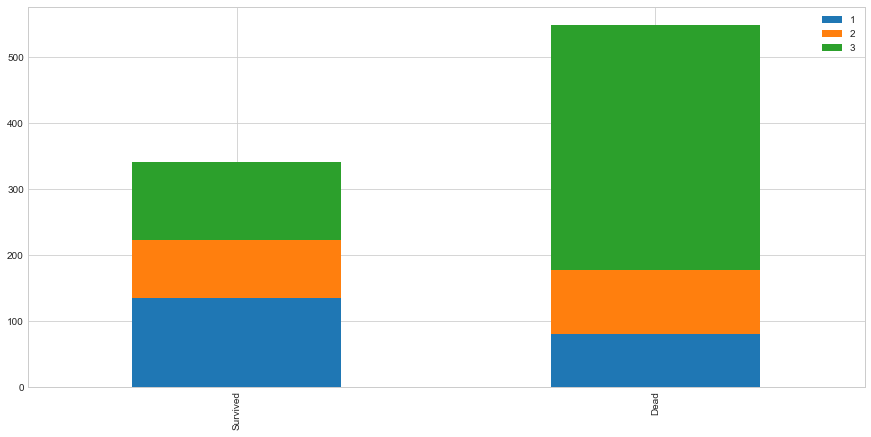

In [84]:
bar_chart('Pclass')

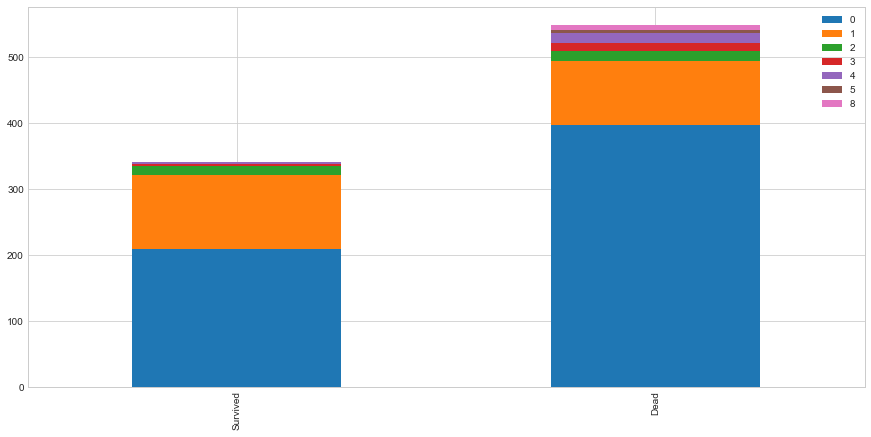

In [87]:
bar_chart('SibSp')

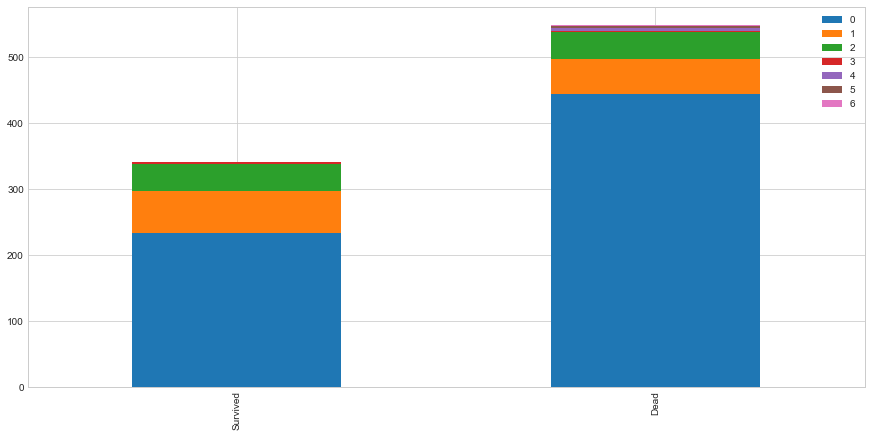

In [88]:
bar_chart('Parch')

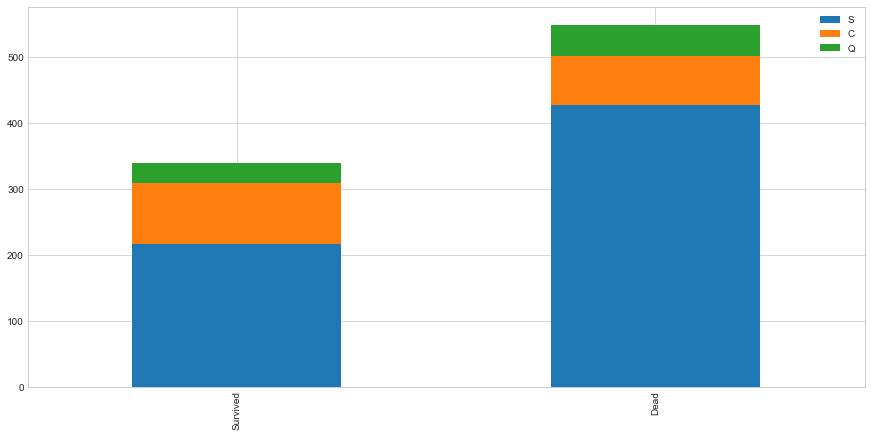

In [90]:
bar_chart('Embarked')

In [ ]:
#List of features matrix list

In [92]:
features=['Age','SibSp','Parch','Pclass','Sex','Fare','Embarked']
#Divide in X and Y
x=dataset[features]
y=dataset['Survived']

In [93]:
x.isnull().sum()

Age         177
SibSp         0
Parch         0
Pclass        0
Sex           0
Fare          0
Embarked      2
dtype: int64

In [95]:
#Fill the null Values

In [97]:
x['Age']=x['Age'].fillna(x['Age'].median())
x['Embarked']=x['Embarked'].fillna(x['Embarked'].value_counts().index[0])

In [ ]:
#Encode categorical values

In [98]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
x['Sex']=LE.fit_transform(x['Sex'])
x['Embarked']=LE.fit_transform(x['Embarked'])

In [ ]:
#Split the data

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [105]:
#Fit our model
from xgboost import XGBClassifier
classifier = XGBClassifier(colsample_bylevel=0.9,colsample_bytree=0.8,gamma=0.9,max_depth=5,min_child_weight= 1,n_estimators= 10,nthread= 4,random_state= 2,silent= True)
classifier.fit(x_train,y_train)
classifier.score(x_test,y_test)

[10:39:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:39:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8444444444444444

In [ ]:
#Take test data for prediction

In [113]:
test_data=pd.read_csv(r'C:\Users\Diksha Nasa\Desktop\Diksha_projects\kaggle_titanic\test.csv')
test_x=test_data[features]

In [114]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [119]:
test_x['Age']=x['Age'].fillna(test_x['Age'].median())
test_x['Fare']=x['Fare'].fillna(test_x['Fare'].median())

In [120]:
#Encode categorical values
test_x['Sex']=LE.fit_transform(test_x['Sex'])
test_x['Embarked']=LE.fit_transform(test_x['Embarked'])

In [121]:
#Predicting the Values
prediction=classifier.predict(test_x)

In [ ]:
#Storing the prediciton in csv file

In [150]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId,'Survived': prediction})
output.to_csv('submission.csv', index=False)
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [152]:
pd.read_csv(r'C:\Users\Diksha Nasa\Desktop\Diksha_projects\kaggle_titanic\Submission.csv')

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
